#INTRODUCTION


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [15]:
filename = "degreespayback.csv"

In [16]:
reactors=pd.read_csv("degreespayback.csv")

In [26]:
reactors.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [27]:
reactors.describe()

,Percent change from Starting to Mid-Career Salary
count,50.000000
mean,69.274000
std,17.909908
min,23.400000
25%,59.125000
50%,67.800000
75%,82.425000
max,103.500000


In [17]:
score_df = pd.read_csv(filename)
score_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [18]:
score_df.rename(columns={"undergraduate major":"major","starting median salary":"starting median salary"
                    ,"Percent change from Starting to Mid-Career Salary":"Percent change","Mid-Career 10th Percentile Salary":"10th Percentile","Mid-Career 25th Percentile Salary":"25th Percentile",
                    "Mid-Career 75th Percentile Salary":"75th Percentile","Mid-Career 90th Percentile Salary":"90th Percentile"},inplace=True)
score_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change,10th Percentile,25th Percentile,75th Percentile,90th Percentile
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [29]:
reactors['Starting Median Salary'].unique()

array(['$46,000.00', '$57,700.00', '$42,600.00', '$36,800.00',
       '$41,600.00', '$35,800.00', '$38,800.00', '$43,000.00',
       '$63,200.00', '$53,900.00', '$38,100.00', '$61,400.00',
       '$55,900.00', '$53,700.00', '$35,000.00', '$35,900.00',
       '$50,100.00', '$34,900.00', '$60,900.00', '$38,000.00',
       '$37,900.00', '$47,900.00', '$39,100.00', '$41,200.00',
       '$43,500.00', '$35,700.00', '$39,200.00', '$37,800.00',
       '$49,100.00', '$36,100.00', '$40,900.00', '$35,600.00',
       '$49,200.00', '$40,800.00', '$45,400.00', '$57,900.00',
       '$54,200.00', '$39,900.00', '$74,300.00', '$50,300.00',
       '$34,100.00', '$36,500.00', '$34,000.00'], dtype=object)

In [19]:
score_df.dtypes

Undergraduate Major          object
Starting Median Salary       object
Mid-Career Median Salary     object
Percent change              float64
10th Percentile              object
25th Percentile              object
75th Percentile              object
90th Percentile              object
dtype: object

# Which major should James pick based on salary?

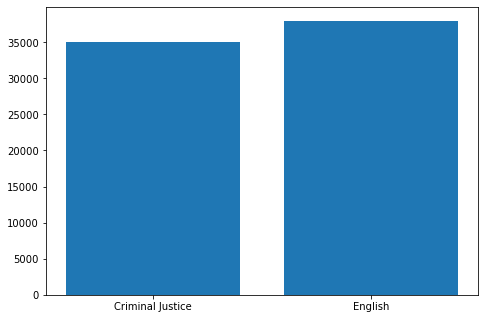

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
major = ['Criminal Justice','English',]
salary = [35000,38000]
ax.bar(major,salary)
plt.show()

# The median salary of the English major is 3000 more than the Criminal justice major 

# Which major should Mariah pick that will help her pay off her loans?

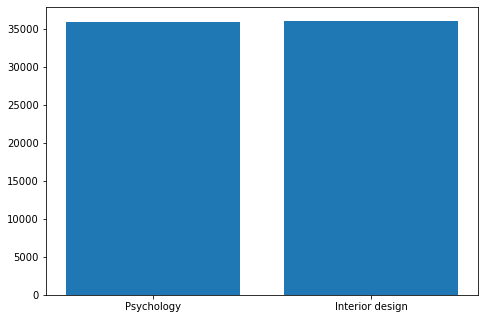

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
major = ['Psychology','Interior design',]
salary = [35900,36100]
ax.bar(major,salary)
plt.show()

# The salaries are really close to each other in terms of amount, but according to the 'Percent change', Psychology has 68.2% while Iterior design only has 47.4% so it looks like Psychology would be the smarter thing to do.

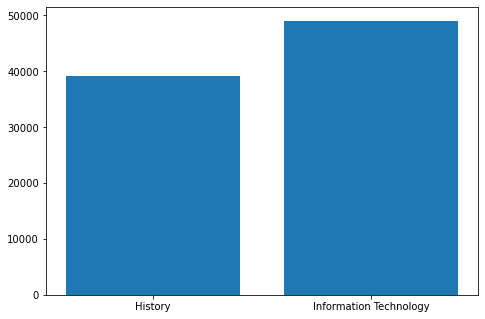

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
major = ['History','Information Technology']
salary = [39200,49100]
ax.bar(major,salary)
plt.show()

# As the data shows, Information Technology startup payment is more tha history major so switching to IT would definitely be a move

# Now to show the top 4 paid majors on our data

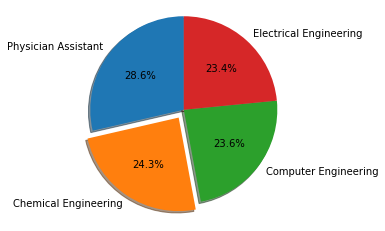

In [2]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Physician Assistant', 'Chemical Engineering', 'Computer Engineering', 'Electrical Engineering'
sizes = [74300, 63200, 61400, 60900]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# As you can see, Engineering majors make 3 of the top 4 with Physician Assistant coming in first place, Chemical Engineering comes in second, and finally Electrical and Computer Engineering.